# TP 2 : Training a neural network

## 1) Training a neural network with keras

In [1]:
%matplotlib inline 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
import keras

In [2]:
digits = load_digits()

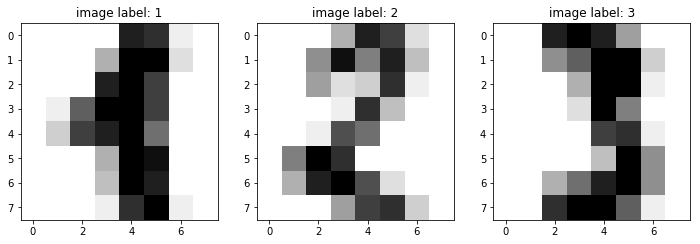

In [3]:
sample_index = np.array([11, 50, 62])
plt.figure(figsize=(12, 12))
for i in np.arange(sample_index.shape[0]):
    plt.subplot(131 + i)
    plt.imshow(digits.images[sample_index[i]], cmap=plt.cm.gray_r,
           interpolation='nearest')
    plt.title("image label: %d" % digits.target[sample_index[i]])
plt.show()

### Preprocessing

In [28]:
#TODO, output X_train with preprocessing and Y_train as a one-hot enconding vectors
X = digits.data
Y = digits.target

In [94]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)
#scaler = StandardScaler()
#scaler.fit(X_train)

#X_train = scaler.transform(X_train)
#X_test = scaler.transform(X_test)

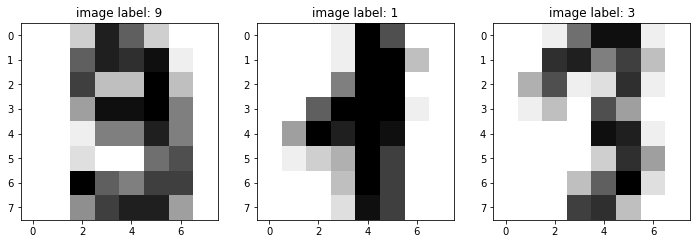

In [95]:
sample_index = np.array([11, 50, 62])
plt.figure(figsize=(12, 12))
for i in np.arange(sample_index.shape[0]):
    plt.subplot(131 + i)
    plt.imshow(X_train[sample_index[i]].reshape((8,8)), cmap=plt.cm.gray_r,
           interpolation='nearest')
    plt.title("image label: %d" % Y_train[sample_index[i]])
plt.show()

In [96]:
from keras.utils import to_categorical
Y_train = to_categorical(Y_train)
Y_train.shape

(1437, 10)

In [97]:
Y_test = to_categorical(Y_test)
Y_test.shape

(360, 10)

### Building and training the neural network

In [106]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras import optimizers

n_i = X_train.shape[1]
n_1 = 30
n_2 = 20
n_3 = 10
n_o = 10

model = Sequential()
model.add(Dense(n_1, input_dim=n_i))
model.add(Activation("tanh"))
#model.add(Dense(n_2, input_dim=n_1))
#model.add(Activation("tanh"))
#model.add(Dense(n_3, input_dim=n_2))
#model.add(Activation("tanh"))
model.add(Dense(n_o))
model.add(Activation("softmax"))

model.compile(optimizer=optimizers.SGD(lr=10),
              loss='categorical_crossentropy', metrics=['accuracy'])
a = model.fit(X_train, Y_train, epochs=100, batch_size=128, validation_data = (X_test, Y_test))

Train on 1437 samples, validate on 360 samples
Epoch 1/100
1437/1437 [==============================] - 1s 623us/step - loss: 12.1487 - acc: 0.1051 - val_loss: 14.4167 - val_acc: 0.1056
Epoch 2/100
1437/1437 [==============================] - 0s 17us/step - loss: 14.5927 - acc: 0.0946 - val_loss: 14.4167 - val_acc: 0.1056
Epoch 3/100
1437/1437 [==============================] - 0s 17us/step - loss: 14.5927 - acc: 0.0946 - val_loss: 14.4167 - val_acc: 0.1056
Epoch 4/100
1437/1437 [==============================] - 0s 21us/step - loss: 14.5927 - acc: 0.0946 - val_loss: 14.4167 - val_acc: 0.1056
Epoch 5/100
1437/1437 [==============================] - 0s 17us/step - loss: 14.5927 - acc: 0.0946 - val_loss: 14.4167 - val_acc: 0.1056
Epoch 6/100
1437/1437 [==============================] - 0s 31us/step - loss: 14.5927 - acc: 0.0946 - val_loss: 14.4167 - val_acc: 0.1056
Epoch 7/100
1437/1437 [==============================] - 0s 26us/step - loss: 14.5927 - acc: 0.0946 - val_loss: 14.4167 - va

1437/1437 [==============================] - 0s 22us/step - loss: 14.5927 - acc: 0.0946 - val_loss: 14.4167 - val_acc: 0.1056
Epoch 60/100
1437/1437 [==============================] - 0s 20us/step - loss: 14.5927 - acc: 0.0946 - val_loss: 14.4167 - val_acc: 0.1056
Epoch 61/100
1437/1437 [==============================] - 0s 22us/step - loss: 14.5927 - acc: 0.0946 - val_loss: 14.4167 - val_acc: 0.1056
Epoch 62/100
1437/1437 [==============================] - 0s 13us/step - loss: 14.5927 - acc: 0.0946 - val_loss: 14.4167 - val_acc: 0.1056
Epoch 63/100
1437/1437 [==============================] - 0s 17us/step - loss: 14.5927 - acc: 0.0946 - val_loss: 14.4167 - val_acc: 0.1056
Epoch 64/100
1437/1437 [==============================] - 0s 15us/step - loss: 14.5927 - acc: 0.0946 - val_loss: 14.4167 - val_acc: 0.1056
Epoch 65/100
1437/1437 [==============================] - 0s 19us/step - loss: 14.5927 - acc: 0.0946 - val_loss: 14.4167 - val_acc: 0.1056
Epoch 66/100
1437/1437 [================

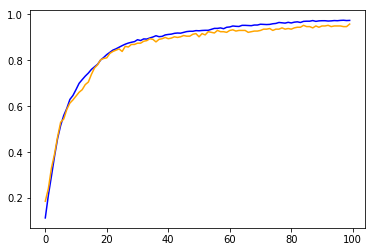

In [105]:
plt.plot(a.epoch, a.history["acc"], c = "blue")
plt.plot(a.epoch, a.history["val_acc"], c = "orange")

In [66]:
score

[0.15749877059004372, 0.9694444444444444]

## 2) Training a neural network with numpy

Start by implementing the softmax function, sigmoid and its derivative, as well as negative log-likelihood:

In [4]:
def softmax(X):
    # TODO:
    return None

def sigmoid(X):
    # TODO
    return None

def dsigmoid(X):
    # TODO
    return None

def nll(Y_true, Y_pred):
    # TODO
    return None

You can complete the following python class to get your numpy network. This class is designed to be "scikit like", meaning that once it has been correctly completed, you can just execute 

-model = NeuralNet(n_features, n_hidden, n_classes); model.fit(X_train,Y_train,lr=0.1, n_epochs=20)

to get it to work. Hints about how to fill the methods can be found in the pdf subject.

In [ ]:
class NeuralNet():
    """MLP with 1 hidden layer and a sigmoid activation"""
    
    def __init__(self, input_size, hidden_size, output_size):
        # TODO
        self.W_h = None
        self.b_h = None
        self.W_o = None
        self.b_o = None
        self.output_size = output_size
        
    def forward(self, X):
        # TODO
        return y
    
    def forward_with_hidden(self, X):
        # TODO
        return y, h, z_h
    
    def loss(self, X, y):
        # TODO
        return L

    def grad_loss(self, x, y_true):
        # TODO
        return grads

    def train_sample(self, x, y, lr):
        # TODO

    def fit(self, X_train, Y_train , lr, n_epochs):
        # TODO
        return losses
    
    def predict(self, X):
        # TODO
        return 

    def accuracy(self, X, y):
        y_preds = np.argmax(self.forward(X), axis=1)
        return np.mean(y_preds == y)